In [4]:
import pandas as pd 
df = pd.read_csv('/Users/xuguangjie/Desktop/shanghaidata_label.20240318133015417.csv', index_col='日期', parse_dates=True)
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
# 定义因变量和外生变量
df = df.iloc[112:114]
y = df['Disgust']
X = df[['First case', 'Begin lockdowns', 'Measures launched', 'Zero case growth', 'Work resumed','Victory declared']]

# 定义ARIMA模型的参数
order = (1, 0, 1)  # (p, d, q) 其中 p=自回归项数, d=差分阶数, q=移动平均项数

# 定义模型
model = SARIMAX(y, exog=X, order=order, enforce_stationarity=False, enforce_invertibility=False)

# 拟合模型
results = model.fit()

# 打印模型摘要
print(results.summary())





RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                               SARIMAX Results                                
Dep. Variable:                Disgust   No. Observations:                    2
Model:               SARIMAX(1, 0, 1

/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/stat

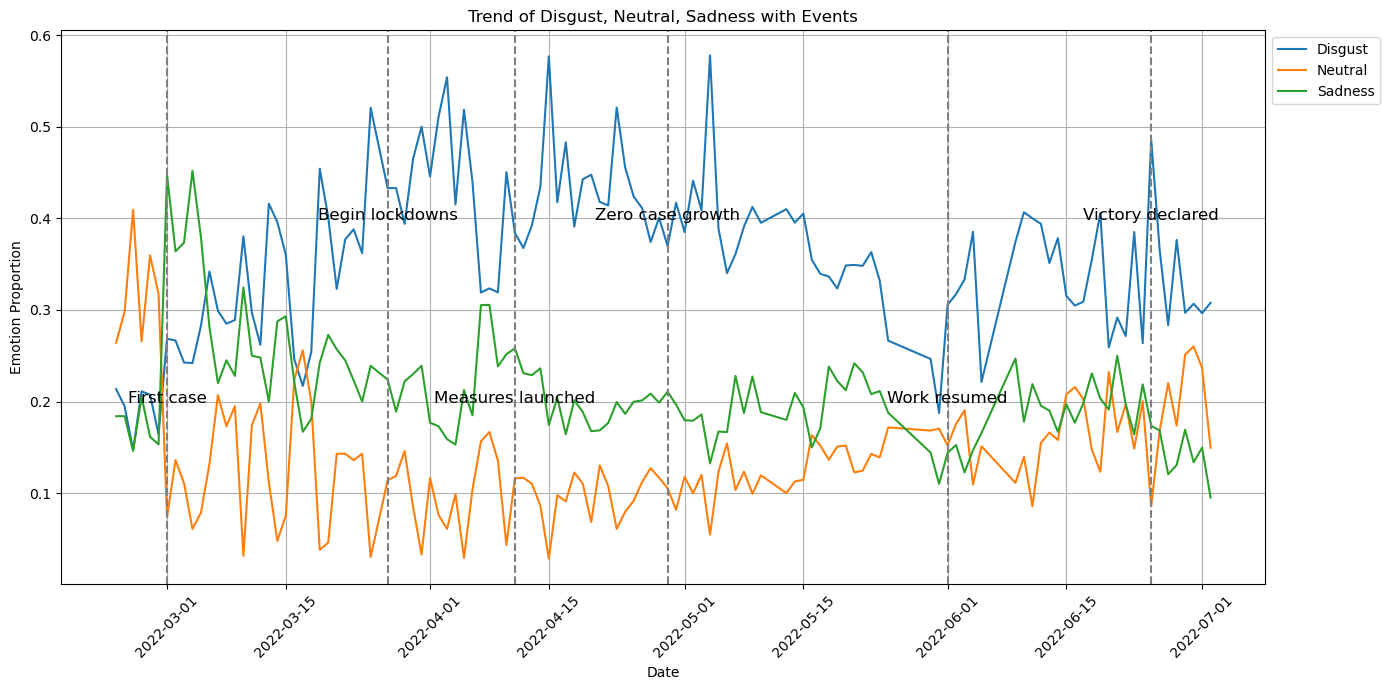

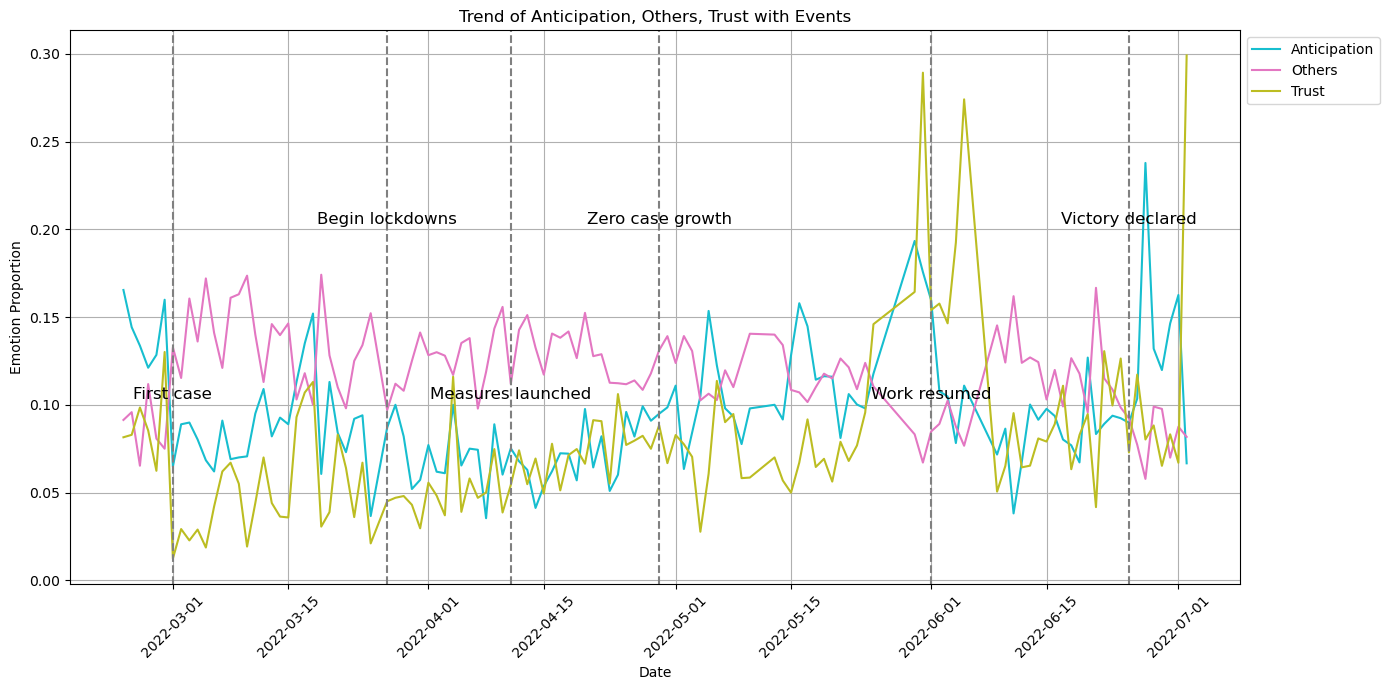

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Load the data
data = pd.read_csv('/Users/xuguangjie/Desktop/shanghaidata_label.20240318133015417.csv')
data['日期'] = pd.to_datetime(data['日期'], format='%Y/%m/%d')

# Define events for annotations
events = {
    '2022-03-01': 'First case',
    '2022-03-27': 'Begin lockdowns',
    '2022-04-11': 'Measures launched',
    '2022-04-29': 'Zero case growth',
    '2022-06-01': 'Work resumed',
    '2022-06-25': 'Victory declared'
}

def plot_emotion_group_with_events(data, emotions, title, events, color_scheme):
    plt.figure(figsize=(14, 7))
    # Assign colors based on the provided color scheme
    colors = color_scheme
    
    for idx, emotion in enumerate(emotions):
        plt.plot(data['日期'], data[emotion], label=emotion, color=colors[idx])
    
    # Get the current y-axis range and calculate the middle position
    y_min, y_max = plt.ylim()
    middle_y_pos = (y_max + y_min) / 2
    
    # Calculate the tick step
    y_ticks = plt.yticks()[0]
    tick_step = y_ticks[1] - y_ticks[0]
    
    # Add vertical dashed lines and annotations for events
    toggle = False  # Toggle to keep track of alternating positions
    for date_str in events.keys():
        date = pd.to_datetime(date_str)
        plt.axvline(x=date, color='gray', linestyle='--')
        
        # Alternate y position for each event
        y_pos = middle_y_pos + (tick_step if toggle else -tick_step)
        
        # Annotate events on the plot
        plt.text(date, y_pos, events[date_str], rotation=0, verticalalignment='center', horizontalalignment='center', fontsize=12, color='black')
        
        toggle = not toggle  # Switch position for next annotation

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Emotion Proportion')
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()

# Colors for the first group of emotions
color_scheme1 = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Colors for the second group of emotions, updated for greater distinction
color_scheme2 = ['#17becf', '#e377c2', '#bcbd22']  # Cyan, Magenta, Yellow

# Example usage with the two groups of emotions
group1_emotions = ['Disgust', 'Neutral', 'Sadness']
plot_emotion_group_with_events(data, group1_emotions, 'Trend of Disgust, Neutral, Sadness with Events', events, color_scheme1)

group2_emotions = ['Anticipation', 'Others', 'Trust']
plot_emotion_group_with_events(data, group2_emotions, 'Trend of Anticipation, Others, Trust with Events', events, color_scheme2)



In [34]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
df = pd.read_csv('/Users/xuguangjie/Desktop/shanghaidata_label.20240318133015417.csv', index_col='日期', parse_dates=True)

# Define policy events and corresponding date ranges
events = {
    '2022-03-01': 'First case',
    '2022-03-27': 'Begin lockdowns',
    '2022-04-11': 'Measures launched',
    '2022-04-29': 'Zero case growth',
    '2022-06-01': 'Work resumed',
    '2022-06-25': 'Victory declared'
}
results_list = []
# Iterate through each policy event
for event_date, policy in events.items():
    # Determine the start and end date for each event
    start_date = pd.to_datetime(event_date) - pd.Timedelta(days=3)
    end_date = pd.to_datetime(event_date) + pd.Timedelta(days=2)
    
    # Subset the DataFrame for the time range of the current event
    df_event = df.loc[start_date:end_date]

    # Define the dependent variable
    y = df_event['Disgust']
    
    # Define the independent variable (exogenous)
    X = df_event[[policy]] if policy in df_event.columns else pd.DataFrame(index=df_event.index)
    
    # Define ARIMA model parameters
    order = (1, 0, 1)  # (p, d, q) where p=number of AR terms, d=number of differencing passes, q=number of MA terms

    # Fit the SARIMAX model
    try:
        model = SARIMAX(y, exog=X, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)  # Set disp=False to prevent printing the fitting process
        
        # Convert the summary table to a DataFrame
        coef_df = pd.DataFrame(results.summary().tables[1].data[1:], columns=results.summary().tables[1].data[0])
        coef_df.set_index('', inplace=True)
        coef_df.columns = [col.strip() for col in coef_df.columns]
        coef_df['policy'] = policy  # Add a column to indicate the policy
        results_list.append(coef_df)
        
    except Exception as e:
        print(f'An error occurred for policy: {policy} - {e}')

# Concatenate all results into a single DataFrame
final_results_df = pd.concat(results_list, axis=0)

# Print the organized results
final_results_df


                         coef    std err          z   P>|z|     [0.025   
                                                                         
First case             0.1369      0.019      7.202   0.000      0.100  \
ar.L1                  0.8450      0.055     15.263   0.000      0.737   
ma.L1                 -0.9985    819.590     -0.001   0.999  -1607.365   
sigma2              6.357e-05      0.052      0.001   0.999     -0.102   
Begin lockdowns       -0.0679      0.001    -55.780   0.000     -0.070   
ar.L1                  0.9611      0.018     52.190   0.000      0.925   
ma.L1                 86.7668   4.85e-08   1.79e+09   0.000     86.767   
sigma2              3.371e-08   5.46e-08      0.617   0.537  -7.34e-08   
Measures launched     -0.0562      0.964     -0.058   0.954     -1.946   
ar.L1                  1.0521      1.002      1.049   0.294     -0.913   
ma.L1                 -0.9998   4827.008     -0.000   1.000  -9461.761   
sigma2                 0.0019      9.1

/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  

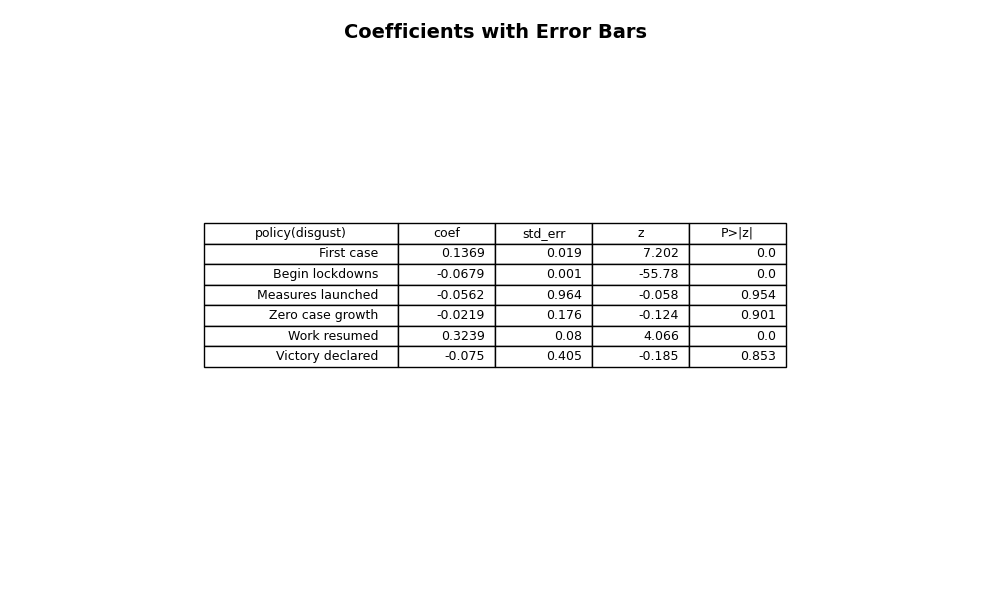

In [39]:
import pandas as pd
import numpy as np

# 构造数据
data = {
    'policy(disgust)': ['First case', 'Begin lockdowns', 'Measures launched', 'Zero case growth', 'Work resumed', 'Victory declared'],
    'coef': [0.1369, -0.0679, -0.0562, -0.0219, 0.3239, -0.0750],
    'std_err': [0.019, 0.001, 0.964, 0.176, 0.080, 0.405],
    'z': [7.202, -55.780, -0.058, -0.124, 4.066, -0.185],
    'P>|z|': [0.000, 0.000, 0.954, 0.901, 0.000, 0.853]
}

# 转换为DataFrame
df = pd.DataFrame(data)

# 创建完整的表格
plt.figure(figsize=(10, 6))
plt.axis('off')  # 关闭坐标轴

# 表格标题
plt.text(0.5, 0.95, 'Coefficients with Error Bars', horizontalalignment='center', fontsize=14, weight='bold')

# 表格内容
plt.table(cellText=df.values, colLabels=df.columns, colWidths=[0.2, 0.1, 0.1, 0.1, 0.1], loc='center')

plt.tight_layout()
plt.show()



In [52]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
df = pd.read_csv('/Users/xuguangjie/Desktop/shanghaidata_label.20240318133015417.csv', index_col='日期', parse_dates=True)

# Define policy events and corresponding date ranges
events = {
    '2022-03-01': 'First case',
    '2022-03-27': 'Begin lockdowns',
    '2022-04-11': 'Measures launched',
    '2022-04-29': 'Zero case growth',
    '2022-06-01': 'Work resumed',
    '2022-06-25': 'Victory declared'
}
results_list = []
# Iterate through each policy event
for event_date, policy in events.items():
    # Determine the start and end date for each event
    start_date = pd.to_datetime(event_date) - pd.Timedelta(days=3)
    end_date = pd.to_datetime(event_date) + pd.Timedelta(days=2)
    
    # Subset the DataFrame for the time range of the current event
    df_event = df.loc[start_date:end_date]

    # Define the dependent variable
    y = df_event['Sadness']
    
    # Define the independent variable (exogenous)
    X = df_event[[policy]] if policy in df_event.columns else pd.DataFrame(index=df_event.index)
    
    # Define ARIMA model parameters
    order = (1, 0, 1)  # (p, d, q) where p=number of AR terms, d=number of differencing passes, q=number of MA terms

    # Fit the SARIMAX model
    try:
        model = SARIMAX(y, exog=X, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)  # Set disp=False to prevent printing the fitting process
        
        # Convert the summary table to a DataFrame
        coef_df = pd.DataFrame(results.summary().tables[1].data[1:], columns=results.summary().tables[1].data[0])
        coef_df.set_index('', inplace=True)
        coef_df.columns = [col.strip() for col in coef_df.columns]
        coef_df['policy'] = policy  # Add a column to indicate the policy
        results_list.append(coef_df)
        
    except Exception as e:
        print(f'An error occurred for policy: {policy} - {e}')

# Concatenate all results into a single DataFrame
final_results_df = pd.concat(results_list, axis=0)
print(final_results_df)


/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  

                         coef    std err          z   P>|z|     [0.025   
                                                                         
First case             0.3081      0.058      5.335   0.000      0.195  \
ar.L1                  0.7823      0.230      3.404   0.001      0.332   
ma.L1                 -1.0005   2053.354     -0.000   1.000  -4025.500   
sigma2                 0.0005      0.936      0.000   1.000     -1.835   
Begin lockdowns       -0.0117     14.811     -0.001   0.999    -29.040   
ar.L1                  0.9835      2.091      0.470   0.638     -3.116   
ma.L1                -43.5319      0.101   -429.577   0.000    -43.731   
sigma2              3.873e-07   9.63e-06      0.040   0.968  -1.85e-05   
Measures launched      0.0166      0.041      0.401   0.689     -0.065   
ar.L1                  0.9625      0.072     13.316   0.000      0.821   
ma.L1                 -1.0011   1006.848     -0.001   0.999  -1974.386   
sigma2                 0.0001      0.1

/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


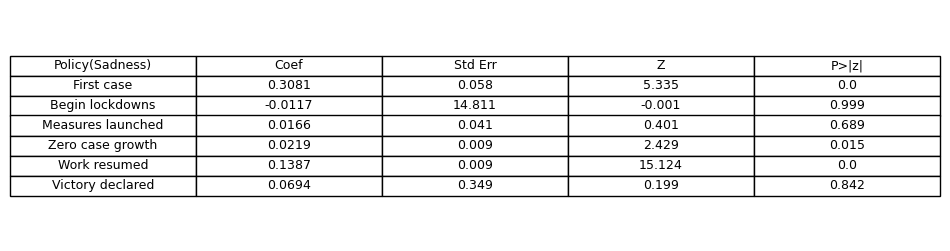

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Given data
data = {
    'Policy(Sadness)': ['First case', 'Begin lockdowns', 'Measures launched', 'Zero case growth', 'Work resumed', 'Victory declared'],
    'Coef': [0.3081, -0.0117, 0.0166, 0.0219, 0.1387, 0.0694],
    'Std Err': [0.058, 14.811, 0.041, 0.009, 0.009, 0.349],
    'Z': [5.335, -0.001, 0.401, 2.429, 15.124, 0.199],
    'P>|z|': [0.000, 0.999, 0.689, 0.015, 0.000, 0.842],
    
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Creating the figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 3))  # Adjust the figure size as needed
ax.axis('off')  # Hide axes

# Creating a table in the plot
tbl = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(9)  # Adjust to the appropriate font size
tbl.scale(1.2, 1.2)  # Adjust scaling to fit your needs

plt.show()


In [56]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
df = pd.read_csv('/Users/xuguangjie/Desktop/shanghaidata_label.20240318133015417.csv', index_col='日期', parse_dates=True)

# Define policy events and corresponding date ranges
events = {
    '2022-03-01': 'First case',
    '2022-03-27': 'Begin lockdowns',
    '2022-04-11': 'Measures launched',
    '2022-04-29': 'Zero case growth',
    '2022-06-01': 'Work resumed',
    '2022-06-25': 'Victory declared'
}
results_list = []
# Iterate through each policy event
for event_date, policy in events.items():
    # Determine the start and end date for each event
    start_date = pd.to_datetime(event_date) - pd.Timedelta(days=3)
    end_date = pd.to_datetime(event_date) + pd.Timedelta(days=2)
    
    # Subset the DataFrame for the time range of the current event
    df_event = df.loc[start_date:end_date]

    # Define the dependent variable
    y = df_event['Neutral']
    
    # Define the independent variable (exogenous)
    X = df_event[[policy]] if policy in df_event.columns else pd.DataFrame(index=df_event.index)
    
    # Define ARIMA model parameters
    order = (1, 0, 1)  # (p, d, q) where p=number of AR terms, d=number of differencing passes, q=number of MA terms

    # Fit the SARIMAX model
    try:
        model = SARIMAX(y, exog=X, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)  # Set disp=False to prevent printing the fitting process
        
        # Convert the summary table to a DataFrame
        coef_df = pd.DataFrame(results.summary().tables[1].data[1:], columns=results.summary().tables[1].data[0])
        coef_df.set_index('', inplace=True)
        coef_df.columns = [col.strip() for col in coef_df.columns]
        coef_df['policy'] = policy  # Add a column to indicate the policy
        results_list.append(coef_df)
        
    except Exception as e:
        print(f'An error occurred for policy: {policy} - {e}')

# Concatenate all results into a single DataFrame
final_results_df = pd.concat(results_list, axis=0)
print(final_results_df)

                         coef    std err          z   P>|z|     [0.025   
                                                                         
First case            -0.2447      0.073     -3.329   0.001     -0.389  \
ar.L1                  1.0152      0.067     15.255   0.000      0.885   
ma.L1                 -0.9996   2691.458     -0.000   1.000  -5276.160   
sigma2                 0.0007      1.865      0.000   1.000     -3.655   
Begin lockdowns        0.1266      0.647      0.196   0.845     -1.142   
ar.L1                 -0.5285    209.151     -0.003   0.998   -410.458   
ma.L1                 -1.0010     35.843     -0.028   0.978    -71.252   
sigma2              4.914e-05      0.029      0.002   0.999     -0.058   
Measures launched      0.1091      0.004     27.292   0.000      0.101   
ar.L1                  0.3016      0.038      7.993   0.000      0.228   
ma.L1                 -0.6960      1.972     -0.353   0.724     -4.562   
sigma2              8.027e-06   2.46e-

/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  

In [4]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
df = pd.read_csv('/Users/xuguangjie/Desktop/shanghaidata_label.20240318133015417.csv', index_col='日期', parse_dates=True)

# Define policy events and corresponding date ranges
events = {
    '2022-03-01': 'First case'
}
results_list = []
# Iterate through each policy event
for event_date, policy in events.items():
    # Determine the start and end date for each event
    start_date = pd.to_datetime(event_date) - pd.Timedelta(days=3)
    end_date = pd.to_datetime(event_date) + pd.Timedelta(days=2)
    
    # Subset the DataFrame for the time range of the current event
    df_event = df.loc[start_date:end_date]

    # Define the dependent variable
    y = df_event['Neutral']
    print(y)
    
    # Define the independent variable (exogenous)
    X = df_event[[policy]] if policy in df_event.columns else pd.DataFrame(index=df_event.index)
    
    # Define ARIMA model parameters
    order = (1, 0, 1)  # (p, d, q) where p=number of AR terms, d=number of differencing passes, q=number of MA terms

    # Fit the SARIMAX model
    try:
        model = SARIMAX(y, exog=X, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)  # Set disp=False to prevent printing the fitting process
        
        # Convert the summary table to a DataFrame
        coef_df = pd.DataFrame(results.summary(), columns=results.summary())
        coef_df.set_index('', inplace=True)
        coef_df.columns = [col.strip() for col in coef_df.columns]
        coef_df['policy'] = policy  # Add a column to indicate the policy
        results_list.append(coef_df)
        
    except Exception as e:
        print(f'An error occurred for policy: {policy} - {e}')


print(final_results_df)



日期
2022-02-26    0.26553
2022-02-27    0.35963
2022-02-28    0.31753
2022-03-01    0.07407
2022-03-02    0.13611
2022-03-03    0.11082
Name: Neutral, dtype: float64
An error occurred for policy: First case - DataFrame constructor not properly called!
                  coef    std err          z   P>|z|     [0.025     0.975]   
                                                                             
First case     -0.2447      0.073     -3.329   0.001     -0.389     -0.101  \
ar.L1           1.0152      0.067     15.255   0.000      0.885      1.146   
ma.L1          -0.9996   2691.458     -0.000   1.000  -5276.160   5274.161   
sigma2          0.0007      1.865      0.000   1.000     -3.655      3.656   

                policy  
                        
First case  First case  
ar.L1       First case  
ma.L1       First case  
sigma2      First case  


/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  

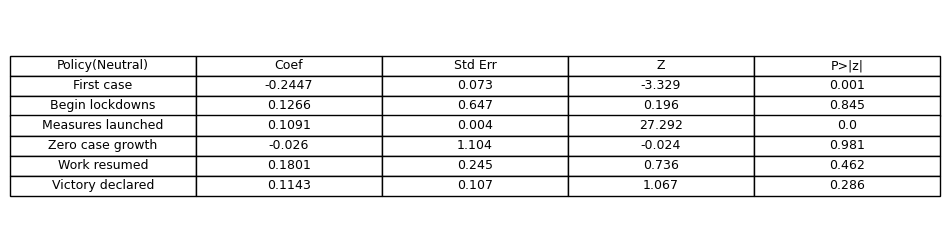

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Given data
data = {
    'Policy(Neutral)': ['First case', 'Begin lockdowns', 'Measures launched', 'Zero case growth', 'Work resumed', 'Victory declared'],
    'Coef': [-0.2447, 0.1266, 0.1091, -0.0260, 0.1801, 0.1143],
    'Std Err': [0.073, 0.647, 0.004, 1.104, 0.245, 0.107],
    'Z': [-3.329, 0.196, 27.292, -0.024, 0.736, 1.067],
    'P>|z|': [0.001, 0.845, 0.000, 0.981, 0.462, 0.286]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Creating the figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 3))  # Adjust the figure size as needed
ax.axis('off')  # Hide axes

# Creating a table in the plot
tbl = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(9)  # Adjust to the appropriate font size
tbl.scale(1.2, 1.2)  # Adjust scaling to fit your needs

plt.show()


In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
df = pd.read_csv('/Users/xuguangjie/Desktop/shanghaidata_label.20240318133015417.csv', index_col='日期', parse_dates=True)

# Define policy events and corresponding date ranges
events = {
    '2022-03-01': 'First case',
    '2022-03-27': 'Begin lockdowns',
    '2022-04-11': 'Measures launched',
    '2022-04-29': 'Zero case growth',
    '2022-06-01': 'Work resumed',
    '2022-06-25': 'Victory declared'
}
results_list = []
# Iterate through each policy event
for event_date, policy in events.items():
    # Determine the start and end date for each event
    start_date = pd.to_datetime(event_date) - pd.Timedelta(days=3)
    end_date = pd.to_datetime(event_date) + pd.Timedelta(days=2)
    
    # Subset the DataFrame for the time range of the current event
    df_event = df.loc[start_date:end_date]

    # Define the dependent variable
    y = df_event['Trust']
    
    # Define the independent variable (exogenous)
    X = df_event[[policy]] if policy in df_event.columns else pd.DataFrame(index=df_event.index)
    
    # Define ARIMA model parameters
    order = (1, 0, 1)  # (p, d, q) where p=number of AR terms, d=number of differencing passes, q=number of MA terms

    # Fit the SARIMAX model
    try:
        model = SARIMAX(y, exog=X, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)  # Set disp=False to prevent printing the fitting process
        
        # Convert the summary table to a DataFrame
        coef_df = pd.DataFrame(results.summary().tables[1].data[1:], columns=results.summary().tables[1].data[0])
        coef_df.set_index('', inplace=True)
        coef_df.columns = [col.strip() for col in coef_df.columns]
        coef_df['policy'] = policy  # Add a column to indicate the policy
        results_list.append(coef_df)
        
    except Exception as e:
        print(f'An error occurred for policy: {policy} - {e}')

# Concatenate all results into a single DataFrame
final_results_df = pd.concat(results_list, axis=0)
print(final_results_df)

                         coef    std err          z   P>|z|     [0.025   
                                                                         
First case            -0.1001      0.817     -0.123   0.902     -1.701  \
ar.L1                  1.0942      1.198      0.913   0.361     -1.255   
ma.L1                 -0.9996   2404.236     -0.000   1.000  -4713.216   
sigma2                 0.0005      1.260      0.000   1.000     -2.468   
Begin lockdowns        0.0480      0.001     37.130   0.000      0.045   
ar.L1                 -0.2628      0.097     -2.720   0.007     -0.452   
ma.L1                 10.0281   7.29e-05   1.38e+05   0.000     10.028   
sigma2              3.637e-08   7.29e-08      0.499   0.618  -1.06e-07   
Measures launched      0.0559      0.013      4.250   0.000      0.030   
ar.L1                  0.4033      0.217      1.859   0.063     -0.022   
ma.L1                 -1.0010    741.719     -0.001   0.999  -1454.744   
sigma2              5.621e-05      0.0

/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  

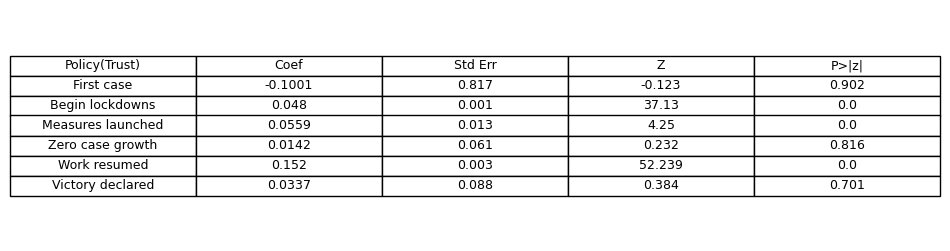

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Given data
data = {
    'Policy(Trust)': ['First case', 'Begin lockdowns', 'Measures launched', 'Zero case growth', 'Work resumed', 'Victory declared'],
    'Coef': [-0.1001, 0.0480, 0.0559, 0.0142, 0.1520, 0.0337],
    'Std Err': [0.817, 0.001, 0.013, 0.061, 0.003, 0.088],
    'Z': [-0.123, 37.130, 4.250, 0.232, 52.239, 0.384],
    'P>|z|': [0.902, 0.000, 0.000, 0.816, 0.000, 0.701]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Creating the figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 3))  # Adjust the figure size as needed
ax.axis('off')  # Hide axes

# Creating a table in the plot
tbl = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(9)  # Adjust to the appropriate font size
tbl.scale(1.2, 1.2)  # Adjust scaling to fit your needs

plt.show()


In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
df = pd.read_csv('/Users/xuguangjie/Desktop/shanghaidata_label.20240318133015417.csv', index_col='日期', parse_dates=True)

# Define policy events and corresponding date ranges
events = {
    '2022-03-01': 'First case',
    '2022-03-27': 'Begin lockdowns',
    '2022-04-11': 'Measures launched',
    '2022-04-29': 'Zero case growth',
    '2022-06-01': 'Work resumed',
    '2022-06-25': 'Victory declared'
}
results_list = []
# Iterate through each policy event
for event_date, policy in events.items():
    # Determine the start and end date for each event
    start_date = pd.to_datetime(event_date) - pd.Timedelta(days=3)
    end_date = pd.to_datetime(event_date) + pd.Timedelta(days=2)
    
    # Subset the DataFrame for the time range of the current event
    df_event = df.loc[start_date:end_date]

    # Define the dependent variable
    y = df_event['Anticipation']
    
    # Define the independent variable (exogenous)
    X = df_event[[policy]] if policy in df_event.columns else pd.DataFrame(index=df_event.index)
    
    # Define ARIMA model parameters
    order = (1, 0, 1)  # (p, d, q) where p=number of AR terms, d=number of differencing passes, q=number of MA terms

    # Fit the SARIMAX model
    try:
        model = SARIMAX(y, exog=X, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)  # Set disp=False to prevent printing the fitting process
        
        # Convert the summary table to a DataFrame
        coef_df = pd.DataFrame(results.summary().tables[1].data[1:], columns=results.summary().tables[1].data[0])
        coef_df.set_index('', inplace=True)
        coef_df.columns = [col.strip() for col in coef_df.columns]
        coef_df['policy'] = policy  # Add a column to indicate the policy
        results_list.append(coef_df)
        
    except Exception as e:
        print(f'An error occurred for policy: {policy} - {e}')

# Concatenate all results into a single DataFrame
final_results_df = pd.concat(results_list, axis=0)
print(final_results_df)

                         coef    std err          z   P>|z|     [0.025   
                                                                         
First case            -0.0972      0.038     -2.580   0.010     -0.171  \
ar.L1                  1.0881      0.061     17.902   0.000      0.969   
ma.L1                 -1.0010    941.704     -0.001   0.999  -1846.706   
sigma2              8.087e-05      0.076      0.001   0.999     -0.149   
Begin lockdowns        0.0897      0.050      1.777   0.076     -0.009   
ar.L1                  8.3332   5.42e-05   1.54e+05   0.000      8.333   
ma.L1               2134.9637   5.44e-09   3.92e+11   0.000   2134.964   
sigma2               7.64e-09   8.61e-09      0.887   0.375  -9.24e-09   
Measures launched      0.0333      0.009      3.527   0.000      0.015   
ar.L1                  0.7090      0.043     16.609   0.000      0.625   
ma.L1                  0.9959   1.32e-06   7.53e+05   0.000      0.996   
sigma2              5.401e-06   1.61e-

/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  

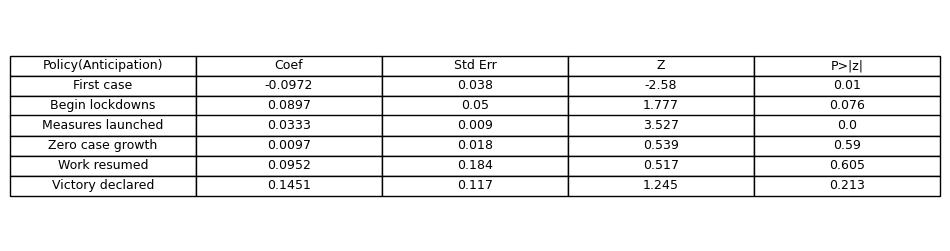

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Given data
data = {
    'Policy(Anticipation)': ['First case', 'Begin lockdowns', 'Measures launched', 'Zero case growth', 'Work resumed', 'Victory declared'],
    'Coef': [-0.0972, 0.0897, 0.0333, 0.0097, 0.0952, 0.1451],
    'Std Err': [0.038, 0.050, 0.009, 0.018, 0.184, 0.117],
    'Z': [-2.580, 1.777, 3.527, 0.539, 0.517, 1.245],
    'P>|z|': [0.010, 0.076, 0.000, 0.590, 0.605, 0.213]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Creating the figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 3))  # Adjust the figure size as needed
ax.axis('off')  # Hide axes

# Creating a table in the plot
tbl = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(9)  # Adjust to the appropriate font size
tbl.scale(1.2, 1.2)  # Adjust scaling to fit your needs

plt.show()


In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
df = pd.read_csv('/Users/xuguangjie/Desktop/shanghaidata_label.20240318133015417.csv', index_col='日期', parse_dates=True)

# Define policy events and corresponding date ranges
events = {
    '2022-03-01': 'First case',
    '2022-03-27': 'Begin lockdowns',
    '2022-04-11': 'Measures launched',
    '2022-04-29': 'Zero case growth',
    '2022-06-01': 'Work resumed',
    '2022-06-25': 'Victory declared'
}
results_list = []
# Iterate through each policy event
for event_date, policy in events.items():
    # Determine the start and end date for each event
    start_date = pd.to_datetime(event_date) - pd.Timedelta(days=3)
    end_date = pd.to_datetime(event_date) + pd.Timedelta(days=2)
    
    # Subset the DataFrame for the time range of the current event
    df_event = df.loc[start_date:end_date]

    # Define the dependent variable
    y = df_event['Others']
    
    # Define the independent variable (exogenous)
    X = df_event[[policy]] if policy in df_event.columns else pd.DataFrame(index=df_event.index)
    
    # Define ARIMA model parameters
    order = (1, 0, 1)  # (p, d, q) where p=number of AR terms, d=number of differencing passes, q=number of MA terms

    # Fit the SARIMAX model
    try:
        model = SARIMAX(y, exog=X, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)  # Set disp=False to prevent printing the fitting process
        
        # Convert the summary table to a DataFrame
        coef_df = pd.DataFrame(results.summary().tables[1].data[1:], columns=results.summary().tables[1].data[0])
        coef_df.set_index('', inplace=True)
        coef_df.columns = [col.strip() for col in coef_df.columns]
        coef_df['policy'] = policy  # Add a column to indicate the policy
        results_list.append(coef_df)
        
    except Exception as e:
        print(f'An error occurred for policy: {policy} - {e}')

# Concatenate all results into a single DataFrame
final_results_df = pd.concat(results_list, axis=0)
print(final_results_df)

                         coef    std err          z   P>|z|     [0.025   
                                                                         
First case             0.0903      4.342      0.021   0.983     -8.420  \
ar.L1                  0.8831    120.422      0.007   0.994   -235.140   
ma.L1                  0.9981   2579.147      0.000   1.000  -5054.037   
sigma2                 0.0005      1.303      0.000   1.000     -2.553   
Begin lockdowns        0.1096      0.001    124.900   0.000      0.108   
ar.L1                 -0.0848      0.048     -1.775   0.076     -0.178   
ma.L1                 35.0243   3.65e-05   9.59e+05   0.000     35.024   
sigma2              1.378e-09   4.45e-09      0.310   0.757  -7.35e-09   
Measures launched     -0.0563      0.015     -3.880   0.000     -0.085   
ar.L1                  1.1031      0.041     26.836   0.000      1.023   
ma.L1                 -0.9988    659.599     -0.002   0.999  -1293.788   
sigma2              2.818e-05      0.0

/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/Users/xuguangjie/opt/anaconda3/envs/mpitest/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  

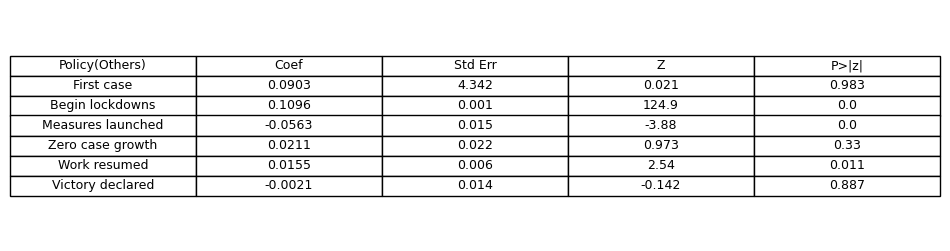

In [6]:

import matplotlib.pyplot as plt
import pandas as pd

# Given data
data = {
    'Policy(Others)': ['First case', 'Begin lockdowns', 'Measures launched', 'Zero case growth', 'Work resumed', 'Victory declared'],
    'Coef': [0.0903, 0.1096, -0.0563, 0.0211, 0.0155, -0.0021],
    'Std Err': [4.342, 0.001, 0.015, 0.022, 0.006, 0.014],
    'Z': [0.021, 124.900, -3.880, 0.973, 2.540, -0.142],
    'P>|z|': [0.983, 0.000, 0.000, 0.330, 0.011, 0.887]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Creating the figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 3))  # Adjust the figure size as needed
ax.axis('off')  # Hide axes

# Creating a table in the plot
tbl = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(9)  # Adjust to the appropriate font size
tbl.scale(1.2, 1.2)  # Adjust scaling to fit your needs

plt.show()


In [ ]:
import pandas as pd 
df = pd.read_csv('/Users/xuguangjie/Desktop/shanghaidata_label.20240318133015417.csv', index_col='日期', parse_dates=True)
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
# 定义因变量和外生变量
y = df['Disgust']
X = df[['First case', 'Begin lockdowns', 'Measures launched', 'Zero case growth', 'Work resumed', 'Victory declared']]

# 定义ARIMA模型的参数
order = (1, 0, 1)  # (p, d, q) 其中 p=自回归项数, d=差分阶数, q=移动平均项数

# 定义模型
model = SARIMAX(y, exog=X, order=order, enforce_stationarity=False, enforce_invertibility=False)

# 拟合模型
results = model.fit()

# 打印模型摘要
print(results.summary())


In [ ]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 加载数据集
df = pd.read_csv('/Users/xuguangjie/Desktop/shanghaidata_label.20240318133015417.csv', index_col='日期', parse_dates=True)

# 定义因变量和外生变量
y = df['Anticipation']
X = df[['First case', 'Begin lockdowns', 'Measures launched', 'Zero case growth', 'Work resumed', 'Victory declared']]

# 定义ARIMA模型的参数
order = (1, 0, 1)  # (p, d, q) 其中 p=自回归项数, d=差分阶数, q=移动平均项数

# 定义模型
model = SARIMAX(y, exog=X, order=order, enforce_stationarity=False, enforce_invertibility=False)

# 拟合模型
results = model.fit()

# 打印模型摘要
print(results.summary())

# 如果需要对未来值进行预测
n_forecast = 6  # 需要预测的期数
forecast = results.get_forecast(steps=n_forecast, exog=X.iloc[-n_forecast:])
forecast_ci = forecast.conf_int()
print(forecast.predicted_mean)
print(forecast_ci)